<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Recurrent-Neural-Network/blob/master/RNN_Google_Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
train_data= pd.read_csv('/content/Google_Stock_Price_Train.csv')
test_data=pd.read_csv('/content/Google_Stock_Price_Test.csv')

In [3]:
train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [0]:
x_train=train_data.iloc[:, 1:2]

In [10]:
x_train

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
5,313.70
6,310.59
7,314.43
8,311.96
9,314.81


### Data preprocessing

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler(feature_range=(0,1))
training_set_scaled=mms.fit_transform(x_train)

In [17]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timetages and 1 output

In [0]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [27]:
x_train.shape

(1198, 60)

In [0]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features]. 

#### Buildig our LSTM layer

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [31]:
regressor= Sequential()

W0901 13:56:50.685624 139695912277888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [38]:
regressor.add(LSTM(units =50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))





W0901 15:13:27.684510 139695912277888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 15:13:27.702618 139695912277888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 15:13:27.953348 139695912277888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0901 15:13:27.963902 139695912277888 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
regressor.add(LSTM(units =50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units =50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units=1))

In [43]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

W0901 15:15:22.026886 139695912277888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [44]:
regressor.fit(x=x_train, y=y_train, epochs=100, batch_size=10)

W0901 15:17:02.303343 139695912277888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0901 15:17:06.635055 139695912277888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0266
Epoch 2/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0065
Epoch 5/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0053
Epoch 8/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0038
Epoch 11/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [============================

In [0]:
real_stock_price=test_data.iloc[:, 1:2].values

In [0]:
dataset_total=pd.concat((train_data['Open'], test_data['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs=inputs.reshape(-1,1)
inputs=mms.transform(inputs)

x_test=[]
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=mms.inverse_transform(predicted_stock_price)

#### Visulaisation

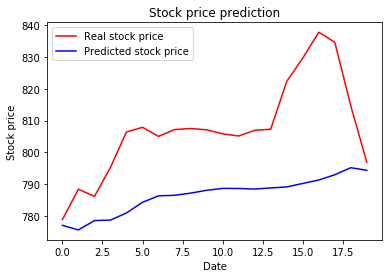

In [52]:
plt.plot(real_stock_price, color='red', label='Real stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted stock price')
plt.title('Stock price prediction')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.legend()
plt.show()